Epoch 1/30
207/207 [==============================] - 6s 26ms/step - loss: 19.8246 - accuracy: 0.2430 - val_loss: 0.5401 - val_accuracy: 0.2495
Epoch 2/30
207/207 [==============================] - 5s 26ms/step - loss: 0.4778 - accuracy: 0.2544 - val_loss: 0.4265 - val_accuracy: 0.2495
Epoch 3/30
207/207 [==============================] - 5s 26ms/step - loss: 0.4073 - accuracy: 0.2544 - val_loss: 0.3921 - val_accuracy: 0.2495
Epoch 4/30
207/207 [==============================] - 5s 26ms/step - loss: 0.3905 - accuracy: 0.2544 - val_loss: 0.3852 - val_accuracy: 0.2495
Epoch 5/30
207/207 [==============================] - 5s 26ms/step - loss: 0.3872 - accuracy: 0.2544 - val_loss: 0.3837 - val_accuracy: 0.2495
Epoch 6/30
207/207 [==============================] - 5s 26ms/step - loss: 0.3864 - accuracy: 0.2544 - val_loss: 0.3832 - val_accuracy: 0.2495
Epoch 7/30
207/207 [==============================] - 5s 26ms/step - loss: 0.3861 - accuracy: 0.2544 - val_loss: 0.3831 - val_accuracy: 0.249

Epoch 28/30
207/207 [==============================] - 6s 27ms/step - loss: 0.3836 - accuracy: 0.2500 - val_loss: 0.3916 - val_accuracy: 0.2673
Epoch 29/30
207/207 [==============================] - 6s 27ms/step - loss: 0.3836 - accuracy: 0.2500 - val_loss: 0.3916 - val_accuracy: 0.2673
Epoch 30/30
207/207 [==============================] - 5s 26ms/step - loss: 0.3836 - accuracy: 0.2500 - val_loss: 0.3916 - val_accuracy: 0.2673
Fold : 1  ce: 0.3915546238422394
Epoch 1/30
207/207 [==============================] - 5s 25ms/step - loss: 19.8102 - accuracy: 0.2477 - val_loss: 0.5351 - val_accuracy: 0.2461
Epoch 2/30
207/207 [==============================] - 5s 26ms/step - loss: 0.4718 - accuracy: 0.2553 - val_loss: 0.4252 - val_accuracy: 0.2461
Epoch 3/30
207/207 [==============================] - 6s 27ms/step - loss: 0.4045 - accuracy: 0.2553 - val_loss: 0.3947 - val_accuracy: 0.2461
Epoch 4/30
207/207 [==============================] - 6s 27ms/step - loss: 0.3892 - accuracy: 0.2553 - va

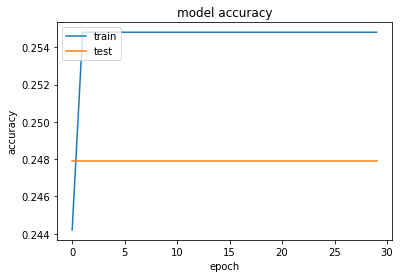

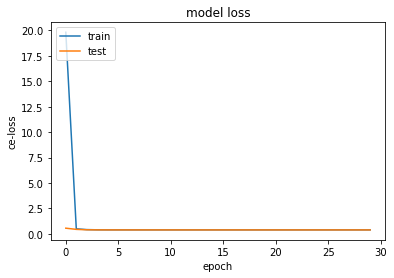

In [4]:
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from tensorflow.python.keras.optimizer_v1 import SGD
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping



# read flash.dat to a list of lists


# collect the train data 
with open("train-data.dat", "r") as file:
     data = file.readlines()
     train=[]
     for i in range(len(data)):
        newlist=re.sub('<([0-9]|([1-9][0-9]))>',' ',data[i])
        train.append(newlist)

# collect the test data 
with open("test-data.dat", "r") as file1:
     data1 = file1.readlines()
     test=[]
     for i in range(len(data1)):
        newlist1=re.sub('<([0-9]|([1-9][0-9]))>',' ',data1[i])
        test.append(newlist1)
     
ytrain1 = np.loadtxt('train-label.dat' , delimiter = ' ')
ytest1 = np.loadtxt('test-label.dat' , delimiter = ' ')

ytrain=np.array(ytrain1)
ytest=np.array(ytest1)


count_vector1 = CountVectorizer(train)
count_vector2 = CountVectorizer(test)




count_vector1.fit(train)
count_vector2.fit(test)





doc_array1 = count_vector1.transform(train).toarray()
doc_array2 = count_vector2.transform(test).toarray()




df1 = pd.DataFrame(doc_array1,index=train,columns=count_vector1.get_feature_names())
df2 = pd.DataFrame(doc_array2,index=test,columns=count_vector2.get_feature_names())

xtrain = tf.keras.utils.normalize(doc_array1)
xtest = tf.keras.utils.normalize(doc_array2)

            #STANDARDIZATION
#xtrain = StandardScaler().fit_transform(df1)
#xtest = StandardScaler().fit_transform(df2)

   
acclist=[]
kfold = KFold(n_splits=5, shuffle=True)
for  i,(train_index, test_index) in enumerate(kfold.split(xtrain)):
    X_train, X_test = xtrain[train_index], xtrain[test_index]
    y_train, y_test = ytrain[train_index], ytrain[test_index]
    
    model = Sequential()
    model.add(tf.keras.layers.Dense(4265,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(l2=0.5)))
    model.add(tf.keras.layers.Dense(20, activation='sigmoid',input_dim=ytrain.shape[1]))
    
    opt=tf.keras.optimizers.SGD(lr=0.05, momentum=0.2, decay=0.0, nesterov=False)

    model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=200)
    history=model.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=30, verbose=1,callbacks=[es])

    score=model.evaluate(X_test,y_test,verbose=0)
    acclist.append(score[0])
   
    print("Fold :", i, " ce:", score[0])
    
    
np.mean(acclist)  
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
   
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('ce-loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [2]:
np.mean(history.history['accuracy'])

0.25200221687555313

In [3]:
np.mean(acclist)


0.38528966903686523